<a href="https://colab.research.google.com/github/memoandrea/Sinandah/blob/main/TOPIC_MODELING_LATENT_DIRICHLET_ALLOCATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#LDA ON 20_NEWSGROUPS DATASET

#load dat, remove email headers,footers and quotes from replied emails

from sklearn.datasets import fetch_20newsgroups
documents = fetch_20newsgroups(remove=('headers','footers','quotes'), random_state  = 101).data


In [ ]:
#SIZE OF THE DATASET

len(documents)

11314

In [ ]:
#CHECK THE COMPOSITION OF ONE DOCUMENT

document_num = 9960
print (documents[document_num])

Help!!!

I have an ADB graphicsd tablet which I want to connect to my
Quadra 950. Unfortunately, the 950 has only one ADB port and
it seems I would have to give up my mouse.

Please, can someone help me? I want to use the tablet as well as
the mouse (and the keyboard of course!!!).

Thanks in advance.


In [ ]:
#IMPORT PYTHON PACKAGES NEEDED TO RUN LDA

import numpy as np
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
np.random.seed(2018)

In [ ]:
#TEXT CLEANING

"""tokenization, lowercasing and removing punctuations.
removal of words composed of fewer than three characters.
removal of words appearing in the english stopwords as they are common and have no predictive power.
lemmatizing tokens.
stemming"""

lm = WordNetLemmatizer()
stemmer = SnowballStemmer('english')

def lem_stem(text):
    return stemmer.stem(lm.lemmatize(text, pos = 'v'))


def tokenize_lemmatize(text):
  return [lem_stem(token)
  for token in gensim.utils.simple_preprocess(text)
  if token not in gensim.parsing.preprocessing.STOPWORDS
          and len(token)>3]

In [ ]:
#download the wordnet resource
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#OPERATE THE CLEANING STEPS IN ALL THE DOCUMENTS

#build a dictionary containing how many times  a word appears in the training set

processed_docs = [tokenize_lemmatize(doc) for doc in documents]
word_count_dict = gensim.corpora.Dictionary(processed_docs)

In [ ]:
#REMOVE THE VERY RARE AND VERY COMMON WORDS
#filter out all the words appearing less than 20 times total and in no more
#than 20% of the documents

word_count_dict.filter_extremes(no_below = 20 , no_above = 0.2)

In [ ]:
#BUILD THE BAG OF WORDS MODEL FROM EACH DOCUMENT

bag_of_words_corpus = [word_count_dict.doc2bow(pdoc) for pdoc in processed_docs]

In [16]:
#RUNNING LDA

lda_model = gensim.models.LdaMulticore(bag_of_words_corpus,
                                       num_topics = 10, id2word = word_count_dict, passes = 50)

In [17]:
#PRINT THE TOPIC COMPOSITION:WORDS APPEARING IN EACH TOPIC AND THEIR RELATIVE WEIGHT

for idx, topic in lda_model.print_topics(-1):
  print('Topic: {} Word Composition: {}'.format(idx, topic))
  print

Topic: 0 Word Composition: 0.016*"armenian" + 0.014*"peopl" + 0.012*"say" + 0.010*"kill" + 0.008*"go" + 0.007*"israel" + 0.007*"come" + 0.006*"jew" + 0.006*"turkish" + 0.006*"right"
Topic: 1 Word Composition: 0.020*"encrypt" + 0.016*"chip" + 0.016*"secur" + 0.011*"clipper" + 0.011*"key" + 0.010*"privaci" + 0.010*"anonym" + 0.009*"govern" + 0.009*"public" + 0.008*"messag"
Topic: 2 Word Composition: 0.015*"peopl" + 0.012*"state" + 0.010*"right" + 0.009*"presid" + 0.008*"work" + 0.008*"govern" + 0.008*"go" + 0.007*"want" + 0.007*"year" + 0.007*"say"
Topic: 3 Word Composition: 0.011*"peopl" + 0.011*"christian" + 0.010*"believ" + 0.008*"jesus" + 0.008*"say" + 0.007*"mean" + 0.007*"exist" + 0.007*"thing" + 0.006*"come" + 0.006*"question"
Topic: 4 Word Composition: 0.018*"drive" + 0.011*"card" + 0.010*"work" + 0.008*"problem" + 0.008*"disk" + 0.007*"driver" + 0.007*"need" + 0.007*"control" + 0.007*"thank" + 0.007*"scsi"
Topic: 5 Word Composition: 0.032*"space" + 0.015*"launch" + 0.011*"orbit"

In [18]:
#MANUALLY PROVIDE A NAME FOR EACH TOPIC AFTER EXAMINING THE COMPOSITION
topics = [
    "Software",
    "Application",
"Reasoning",
    "Government",
    "Religion",
    "People actions",
    "Middle East",
    "Pc services",
    "Space",
    "Games",
    "Drives"]


In [22]:
#UNDERSTAND WHAT TOPICS ARE REPRESENTED IN THE PRECEEDING DOCUMENT AND THEIR WEIGHTS

for index, score in sorted(lda_model[bag_of_words_corpus[document_num]], key=lambda tup: -1*tup[1]):
  print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index,10)))


Score: 0.939989447593689	 
Topic: 0.018*"drive" + 0.011*"card" + 0.010*"work" + 0.008*"problem" + 0.008*"disk" + 0.007*"driver" + 0.007*"need" + 0.007*"control" + 0.007*"thank" + 0.007*"scsi"


In [23]:
#EVALUATE THE MODEL AS A WHOLE

""" perplexity logarithm provides a metric to understand  how well lda has performed on
the training dataset"""

print('\nPerplexity: ', lda_model.log_perplexity(bag_of_words_corpus))
#


Perplexity:  -7.215156250373112


In [24]:
#TEST THE MODEL ON UNSEEN DOCUMENT

unseen_document = "Golf or tennis? Which is the best sport to play?"
bow_vector = word_count_dict.doc2bow(tokenize_lemmatize(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
  print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index,5)))

Score: 0.8199755549430847	 Topic: 0.027*"game" + 0.019*"team" + 0.017*"play" + 0.015*"year" + 0.012*"player"
Score: 0.02000456675887108	 Topic: 0.018*"drive" + 0.011*"card" + 0.010*"work" + 0.008*"problem" + 0.008*"disk"
Score: 0.020002877339720726	 Topic: 0.012*"time" + 0.009*"good" + 0.009*"year" + 0.008*"thing" + 0.008*"problem"
Score: 0.02000274695456028	 Topic: 0.011*"peopl" + 0.011*"christian" + 0.010*"believ" + 0.008*"jesus" + 0.008*"say"
Score: 0.020002691075205803	 Topic: 0.015*"peopl" + 0.012*"state" + 0.010*"right" + 0.009*"presid" + 0.008*"work"
Score: 0.020002657547593117	 Topic: 0.025*"file" + 0.021*"window" + 0.015*"program" + 0.010*"imag" + 0.009*"version"
Score: 0.020002298057079315	 Topic: 0.014*"post" + 0.013*"inform" + 0.013*"univers" + 0.013*"mail" + 0.012*"list"
Score: 0.02000224031507969	 Topic: 0.032*"space" + 0.015*"launch" + 0.011*"orbit" + 0.011*"nasa" + 0.010*"satellit"
Score: 0.020002173259854317	 Topic: 0.020*"encrypt" + 0.016*"chip" + 0.016*"secur" + 0.01

In [32]:
#LDA IS ITERATIVE AND ALLOWS ONLINE LEARNING- LARGE CORPUS
#test on subset of the original corpus composed of the first 1000 documents
#update lda model with batches of 50, 100, 200 and 500 documents
#record the time and plot them on a graph for each mini batch updating the model

import time
small_corpus = bag_of_words_corpus[:1000]
batch_times = {}
for batch_size in [50, 100, 200, 500]:
  print("batch_size", batch_size) # Changed from "batch_size" == batch_size
  tik0 = time.time()
  lda_model = gensim.models.LdaMulticore(num_topics = 12, id2word = word_count_dict)
  batch_times[batch_size] = []
  for i in range(0, len(small_corpus), batch_size):
    # The 'passes' parameter is not supported in the 'update' method.
    # Assuming you want to control the number of passes over each batch,
    # you might need to iterate over the batch multiple times manually.
    for _ in range(1 + int(500/batch_size)):
        lda_model.update(small_corpus[i:i+batch_size])
    batch_times[batch_size].append(time.time() - tik0)


batch_size 50


batch_size 100


batch_size 200


batch_size 500


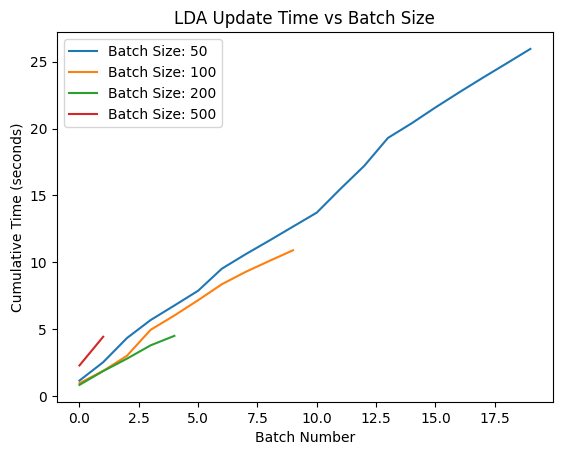

In [34]:
#PLOT THE RESULTS

# Plotting the results

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for batch_size, times in batch_times.items():
    ax.plot(times, label=f"Batch Size: {batch_size}")

ax.set_xlabel("Batch Number")
ax.set_ylabel("Cumulative Time (seconds)")
ax.set_title("LDA Update Time vs Batch Size")
ax.legend()
plt.show()